In [40]:
from tkinter import *
from tkinter import filedialog

file_name = filedialog.askopenfilename(filetypes=(("File", ".csv"),("All files", "*.*")))
print(file_name)

D:/USA/Research Projects/Fake News/Data/fake_or_real_news.csv


In [1]:
import nltk
import pandas as pd
import numpy as np
import sys
from sklearn.metrics import accuracy_score

In [8]:
data_raw = pd.read_csv('fake_or_real_news.csv')
data_raw.loc[data_raw['label']=='FAKE','status']=1
data_raw.loc[data_raw['label']=='REAL','status']=0
print('shape of the data = ', np.shape(data_raw))
data_raw.head()

shape of the data =  (6335, 5)


,Unnamed: 0,title,text,label,status
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1.0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1.0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0.0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1.0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0.0


In [9]:
# Process raw data into 2 separate data - Title & Text
Title = data_raw[['title', 'status']]
Text = data_raw[['text', 'status']]

#Title.head()

# P(Fake | Title) 

### Train - Test Splitting

In [10]:
from sklearn.cross_validation import train_test_split
features_title = Title['title']
responses_title = Title['status']

Train_features_title, Test_features_title, Train_responses_title, Test_responses_title = train_test_split(features_title, responses_title, test_size=0.2, random_state=42)

C:\Users\ghoshal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Digitizing Text data

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer (stop_words='english')
# digitizing features
D_Train_features_title = Vectorizer.fit_transform(Train_features_title)  ##sparse-matrix
D_Test_features_title = Vectorizer.transform(Test_features_title)  ##sparse-matrix

# for LDA, QDA, RF : dense-matrix required
DD_Train_features_title = D_Train_features_title.todense()
DD_Test_features_title = D_Test_features_title.todense()

### Model fitting

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

#################################
## Multinomial Naive Bayes ##
#################################
MNB = MultinomialNB()
MNB.fit(D_Train_features_title, Train_responses_title)


#############################
## Logistic Regression ##
#############################
LR = LogisticRegression()
LR.fit(D_Train_features_title, Train_responses_title)


######################################
## Linear Discriminant Analysis ##
######################################
LDA = LinearDiscriminantAnalysis()
LDA.fit(DD_Train_features_title, Train_responses_title)


######################################
## Qudratic Discriminant Analysis ##
######################################
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(DD_Train_features_title, Train_responses_title)


######################################
## Random Forest ##
######################################
RF = RandomForestClassifier()
RF.fit(DD_Train_features_title, Train_responses_title)


C:\Users\ghoshal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\ghoshal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predictions

In [13]:
#################################
## Multinomial Naive Bayes ##
#################################
pred_mnb_title = MNB.predict(D_Test_features_title)
probs_mnb_title = MNB.predict_proba(D_Test_features_title)
accuracy_mnb_title = accuracy_score(Test_responses_title, pred_mnb_title)
#print(np.around(probs_mnb_title,decimals=2))

#############################
## Logistic Regression ##
#############################
pred_lr_title = LR.predict(D_Test_features_title)
probs_lr_title =LR.predict_proba(D_Test_features_title)
accuracy_lr_title = accuracy_score(Test_responses_title,pred_lr_title)
#print(np.around(probs_lr_title,decimals=2))

######################################
## Linear Discriminant Analysis ##
######################################
pred_lda_title = LDA.predict(DD_Test_features_title)
probs_lda_title = LDA.predict_proba(DD_Test_features_title)
accuracy_lda_title = accuracy_score(Test_responses_title, pred_lda_title)
#print(np.around(probs_lda_title,decimals=2))

######################################
## Quadratic Discriminant Analysis ##
######################################
pred_qda_title = QDA.predict(DD_Test_features_title)
probs_qda_title = QDA.predict_proba(DD_Test_features_title)
accuracy_qda_title = accuracy_score(Test_responses_title, pred_qda_title)
#print(np.around(probs_qda_title,decimals=2))

######################################
## Random Forest ##
######################################
pred_rf_title = RF.predict(DD_Test_features_title)
probs_rf_title = RF.predict_proba(DD_Test_features_title)
accuracy_rf_title = accuracy_score(Test_responses_title, pred_rf_title)
#print(np.around(probs_rf_title,decimals=2))

print(accuracy_mnb_title,accuracy_lr_title, accuracy_lda_title, accuracy_qda_title, accuracy_rf_title)

C:\Users\ghoshal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.79952644041 0.818468823994 0.583267561168 0.554853985793 0.771112865036


# P (Fake | Text)

## All in one block

In [14]:
################## Train-Test spliting ###########################
from sklearn.cross_validation import train_test_split
features_text = Text['text']
responses_text = Text['status']

Train_features_text, Test_features_text, Train_responses_text, Test_responses_text = train_test_split(features_text, responses_text, test_size=0.2, random_state=42)
#---------------------------


################## Digitizing text data #########################
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer (stop_words='english')
# digitizing features
D_Train_features_text = Vectorizer.fit_transform(Train_features_text)  ##sparse-matrix
D_Test_features_text = Vectorizer.transform(Test_features_text)  ##sparse-matrix

# for LDA, QDA, RF : dense-matrix required                    ***************
#DD_Train_features_text = D_Train_features_text.todense()     **************
#DD_Test_features_text = D_Test_features_text.todense()       **************
#---------------------------


################## Model fitting ################################
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

#################################
## Multinomial Naive Bayes ##
#################################
MNB = MultinomialNB()
MNB.fit(D_Train_features_text, Train_responses_text)


#############################
## Logistic Regression ##
#############################
LR = LogisticRegression()
LR.fit(D_Train_features_text, Train_responses_text)


######################################
## Linear Discriminant Analysis ##
######################################
#LDA = LinearDiscriminantAnalysis()                       **********
#LDA.fit(DD_Train_features_text, Train_responses_text)    **********


######################################
## Qudratic Discriminant Analysis ##
######################################
#QDA = QuadraticDiscriminantAnalysis()                    *********
#QDA.fit(DD_Train_features_text, Train_responses_text)    *********


######################################
## Random Forest ##
######################################
#RF = RandomForestClassifier()                             **********
#RF.fit(DD_Train_features_text, Train_responses_text)      **********
#----------------------------------------------------


######################### Predictions  ##########################
#################################
## Multinomial Naive Bayes ##
#################################
pred_mnb_text = MNB.predict(D_Test_features_text)
probs_mnb_text = MNB.predict_proba(D_Test_features_text)
accuracy_mnb_text = accuracy_score(Test_responses_text,pred_mnb_text)


#############################
## Logistic Regression ##
#############################
pred_lr_text = LR.predict(D_Test_features_text)
probs_lr_text =LR.predict_proba(D_Test_features_text)
accuracy_lr_text = accuracy_score(Test_responses_text, pred_lr_text)


######################################
## Linear Discriminant Analysis ##
######################################
#pred_lda_text = LDA.predict(DD_Test_features_text)                       ******
#probs_lda_text = LDA.predict_proba(DD_Test_features_text)                ******
#accuracy_lda_text = accuracy_score(Test_responses_text, pred_lda_text)   ******


######################################
## Quadratic Discriminant Analysis ##
######################################
#pred_qda_text = QDA.predict(DD_Test_features_text)                        ******
#probs_qda_text = QDA.predict_proba(DD_Test_features_text)                 ******
#accuracy_qda_text = accuracy_score(Test_responses_text, pred_qda_text)    ******


######################################
## Random Forest ##
######################################
#pred_rf_text = RF.predict(DD_Test_features_text)                          ******
#probs_rf_text = RF.predict_proba(DD_Test_features_text)                   ******
#accuracy_rf_text = accuracy_score(Test_responses_text, pred_rf_text)       ******

print(accuracy_mnb_text,accuracy_lr_text)#,accuracy_lda_text, accuracy_qda_text, accuracy_rf_text)

0.898973954223 0.927387529597


# Plotting

## Title analysis

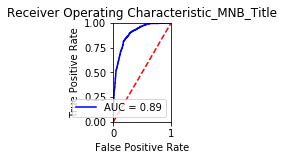

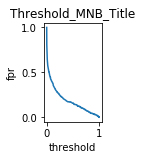

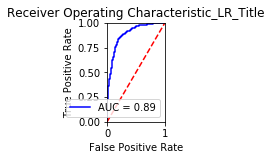

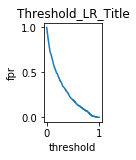

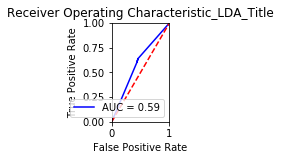

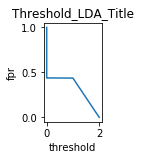

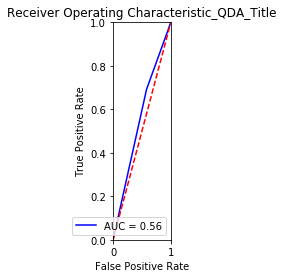

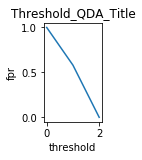

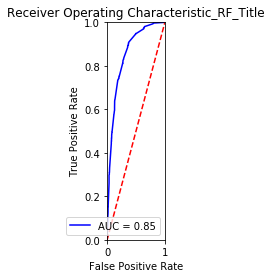

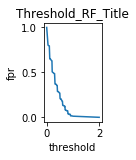

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

#plt.figure()

plt.subplot(2,5,1)
fpr_mnb_title,tpr_mnb_title, threshold_mnb_title = roc_curve(Test_responses_title,probs_mnb_title[:,1])
roc_auc_mnb_title = auc(fpr_mnb_title,tpr_mnb_title)
plt.title('Receiver Operating Characteristic_MNB_Title')
plt.plot(fpr_mnb_title, tpr_mnb_title, 'b', label = 'AUC = %0.2f' % roc_auc_mnb_title)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplot(2,5,6)
plt.plot(threshold_mnb_title,fpr_mnb_title)
plt.title('Threshold_MNB_Title')
plt.xlabel('threshold')
plt.ylabel('fpr')
plt.show()


plt.subplot(2,5,2)
fpr_lr_title,tpr_lr_title, threshold_lr_title = roc_curve(Test_responses_title,probs_lr_title[:,1])
roc_auc_lr_title = auc(fpr_lr_title,tpr_lr_title)
plt.title('Receiver Operating Characteristic_LR_Title')
plt.plot(fpr_lr_title, tpr_lr_title, 'b', label = 'AUC = %0.2f' % roc_auc_lr_title)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplot(2,5,7)
plt.plot(threshold_lr_title,fpr_lr_title)
plt.title('Threshold_LR_Title')
plt.xlabel('threshold')
plt.ylabel('fpr')
plt.show()


plt.subplot(2,5,3)
fpr_lda_title,tpr_lda_title, threshold_lda_title = roc_curve(Test_responses_title,probs_lda_title[:,1])
roc_auc_lda_title = auc(fpr_lda_title,tpr_lda_title)
plt.title('Receiver Operating Characteristic_LDA_Title')
plt.plot(fpr_lda_title, tpr_lda_title, 'b', label = 'AUC = %0.2f' % roc_auc_lda_title)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplot(2,5,8)
plt.plot(threshold_lda_title,fpr_lda_title)
plt.title('Threshold_LDA_Title')
plt.xlabel('threshold')
plt.ylabel('fpr')
plt.show()


plt.subplot(1,5,4)
fpr_qda_title,tpr_qda_title, threshold_qda_title = roc_curve(Test_responses_title,probs_qda_title[:,1])
roc_auc_qda_title = auc(fpr_qda_title,tpr_qda_title)
plt.title('Receiver Operating Characteristic_QDA_Title')
plt.plot(fpr_qda_title, tpr_qda_title, 'b', label = 'AUC = %0.2f' % roc_auc_qda_title)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplot(2,5,9)
plt.plot(threshold_qda_title,fpr_qda_title)
plt.title('Threshold_QDA_Title')
plt.xlabel('threshold')
plt.ylabel('fpr')
plt.show()


plt.subplot(1,5,5)
fpr_rf_title,tpr_rf_title, threshold_rf_title = roc_curve(Test_responses_title,probs_rf_title[:,1])
roc_auc_rf_title = auc(fpr_rf_title,tpr_rf_title)
plt.title('Receiver Operating Characteristic_RF_Title')
plt.plot(fpr_rf_title, tpr_rf_title, 'b', label = 'AUC = %0.2f' % roc_auc_rf_title)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplot(2,5,10)
plt.plot(threshold_rf_title,fpr_rf_title)
plt.title('Threshold_RF_Title')
plt.xlabel('threshold')
plt.ylabel('fpr')
plt.show()

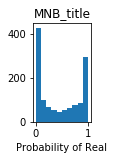

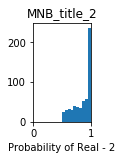

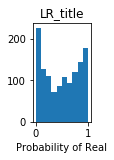

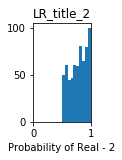

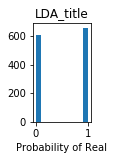

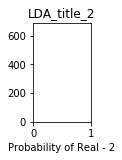

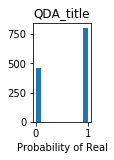

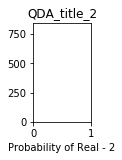

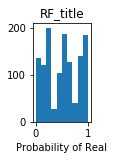

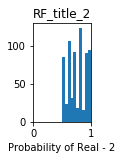

In [16]:
import matplotlib.pyplot as plt

plt.subplot(2,5,1)
real_prob_mnb_title = probs_mnb_title[:,1]
real2_prob_mnb_title = [i for i in real_prob_mnb_title if i >= 0.5]
plt.hist(real_prob_mnb_title)
plt.title('MNB_title')
plt.xlabel("Probability of Real")
plt.show()

plt.subplot(2,5,6)
plt.hist(real2_prob_mnb_title)
plt.title('MNB_title_2')
plt.xlim([0, 1])
plt.xlabel("Probability of Real - 2")
plt.show()


plt.subplot(2,5,2)
real_prob_lr_title = probs_lr_title[:,1]
real2_prob_lr_title = [i for i in real_prob_lr_title if i >= 0.5]
plt.hist(real_prob_lr_title)
plt.title('LR_title')
plt.xlabel("Probability of Real")
plt.show()

plt.subplot(2,5,7)
plt.hist(real2_prob_lr_title)
plt.title('LR_title_2')
plt.xlim([0, 1])
plt.xlabel("Probability of Real - 2")
plt.show()


plt.subplot(2,5,3)
real_prob_lda_title = probs_lda_title[:,1]
real2_prob_lda_title = [i for i in real_prob_lda_title if i == 1]
plt.hist(real_prob_lda_title)
plt.title('LDA_title')
plt.xlabel("Probability of Real")
plt.show()

plt.subplot(2,5,8)
plt.hist(real2_prob_lda_title)
plt.title('LDA_title_2')
plt.xlim([0, 1])
plt.xlabel("Probability of Real - 2")
plt.show()


plt.subplot(2,5,4)
real_prob_qda_title = probs_qda_title[:,1]
real2_prob_qda_title = [i for i in real_prob_qda_title if i == 1]
plt.hist(real_prob_qda_title)
plt.title('QDA_title')
plt.xlabel("Probability of Real")
plt.show()

plt.subplot(2,5,9)
plt.hist(real2_prob_qda_title)
plt.title('QDA_title_2')
plt.xlim([0, 1])
plt.xlabel("Probability of Real - 2")
plt.show()


plt.subplot(2,5,5)
real_prob_rf_title = probs_rf_title[:,1]
real2_prob_rf_title = [i for i in real_prob_rf_title if i >= 0.5]
plt.hist(real_prob_rf_title)
plt.title('RF_title')
plt.xlabel("Probability of Real")
plt.show()

plt.subplot(2,5,10)
plt.hist(real2_prob_rf_title)
plt.title('RF_title_2')
plt.xlim([0, 1])
plt.xlabel("Probability of Real - 2")
plt.show()



## Text Analysis

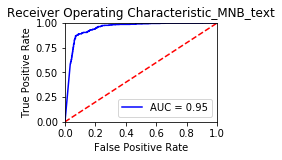

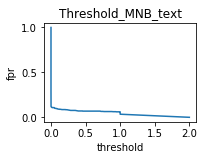

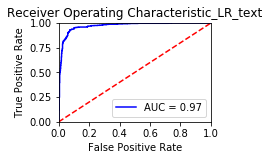

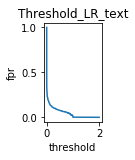

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

#plt.figure()

plt.subplot(2,2,1)
fpr_mnb_text,tpr_mnb_text, threshold_mnb_text = roc_curve(Test_responses_text,probs_mnb_text[:,1])
roc_auc_mnb_text = auc(fpr_mnb_text,tpr_mnb_text)
plt.title('Receiver Operating Characteristic_MNB_text')
plt.plot(fpr_mnb_text, tpr_mnb_text, 'b', label = 'AUC = %0.2f' % roc_auc_mnb_text)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplot(2,2,3)
plt.plot(threshold_mnb_text,fpr_mnb_text)
plt.title('Threshold_MNB_text')
plt.xlabel('threshold')
plt.ylabel('fpr')
plt.show()


plt.subplot(2,2,2)
fpr_lr_text,tpr_lr_text, threshold_lr_text = roc_curve(Test_responses_text,probs_lr_text[:,1])
roc_auc_lr_text = auc(fpr_lr_text,tpr_lr_text)
plt.title('Receiver Operating Characteristic_LR_text')
plt.plot(fpr_lr_text, tpr_lr_text, 'b', label = 'AUC = %0.2f' % roc_auc_lr_text)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplot(2,5,7)
plt.plot(threshold_lr_text,fpr_lr_text)
plt.title('Threshold_LR_text')
plt.xlabel('threshold')
plt.ylabel('fpr')
plt.show()



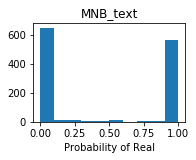

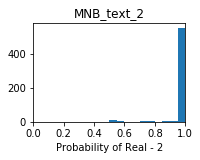

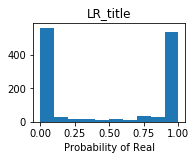

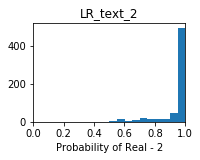

In [18]:
import matplotlib.pyplot as plt

plt.subplot(2,2,1)
real_prob_mnb_text = probs_mnb_text[:,1]
real2_prob_mnb_text = [i for i in real_prob_mnb_text if i >= 0.5]
plt.hist(real_prob_mnb_text)
plt.title('MNB_text')
plt.xlabel("Probability of Real")
plt.show()

plt.subplot(2,2,3)
plt.hist(real2_prob_mnb_text)
plt.title('MNB_text_2')
plt.xlim([0, 1])
plt.xlabel("Probability of Real - 2")
plt.show()


plt.subplot(2,2,2)
real_prob_lr_text = probs_lr_text[:,1]
real2_prob_lr_text = [i for i in real_prob_lr_text if i >= 0.5]
plt.hist(real_prob_lr_text)
plt.title('LR_title')
plt.xlabel("Probability of Real")
plt.show()

plt.subplot(2,2,4)
plt.hist(real2_prob_lr_text)
plt.title('LR_text_2')
plt.xlim([0, 1])
plt.xlabel("Probability of Real - 2")
plt.show()



# P (Fake | Title & Text)

## Combining Title + Text

In [19]:
all_features = data_raw['title'].map(str)+ ' ' + data_raw['text']
all_responses = data_raw['status']
#features = tuple(set(features_title) | set(features_text)) -- ??

## Analysis

0.902131018153 0.925808997632


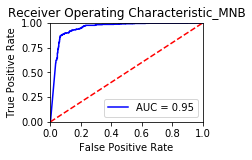

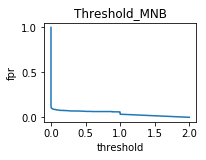

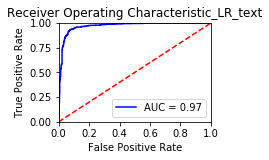

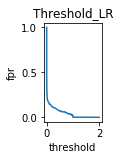

In [20]:
################## Train-Test spliting ###########################
from sklearn.cross_validation import train_test_split

Train_features, Test_features, Train_responses, Test_responses = train_test_split(all_features, all_responses, test_size=0.2, random_state=42)
#---------------------------


################## Digitizing text data #########################
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer (stop_words='english')
# digitizing features
D_Train_features = Vectorizer.fit_transform(Train_features)  ##sparse-matrix
D_Test_features = Vectorizer.transform(Test_features)  ##sparse-matrix
#---------------------------


################## Model fitting ################################
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

#################################
## Multinomial Naive Bayes ##
#################################
MNB = MultinomialNB()
MNB.fit(D_Train_features, Train_responses)


#############################
## Logistic Regression ##
#############################
LR = LogisticRegression()
LR.fit(D_Train_features, Train_responses)
#---------------------------------------------------------------



######################### Predictions  ##########################
#################################
## Multinomial Naive Bayes ##
#################################
pred_mnb = MNB.predict(D_Test_features)
probs_mnb = MNB.predict_proba(D_Test_features)
accuracy_mnb = accuracy_score(Test_responses,pred_mnb)


#############################
## Logistic Regression ##
#############################
pred_lr = LR.predict(D_Test_features)
probs_lr =LR.predict_proba(D_Test_features)
accuracy_lr = accuracy_score(Test_responses, pred_lr)

print(accuracy_mnb, accuracy_lr)
#----------------------------------------------------------------------


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


plt.subplot(2,2,1)
fpr_mnb,tpr_mnb, threshold_mnb = roc_curve(Test_responses,probs_mnb[:,1])
roc_auc_mnb = auc(fpr_mnb,tpr_mnb)
plt.title('Receiver Operating Characteristic_MNB')
plt.plot(fpr_mnb, tpr_mnb, 'b', label = 'AUC = %0.2f' % roc_auc_mnb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplot(2,2,3)
plt.plot(threshold_mnb,fpr_mnb)
plt.title('Threshold_MNB')
plt.xlabel('threshold')
plt.ylabel('fpr')
plt.show()


plt.subplot(2,2,2)
fpr_lr,tpr_lr, threshold_lr = roc_curve(Test_responses,probs_lr[:,1])
roc_auc_lr = auc(fpr_lr,tpr_lr)
plt.title('Receiver Operating Characteristic_LR_text')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplot(2,5,7)
plt.plot(threshold_lr,fpr_lr)
plt.title('Threshold_LR')
plt.xlabel('threshold')
plt.ylabel('fpr')
plt.show()




# Exploration of Text and Title

In [26]:
fake_index = data_raw['label']=="FAKE"
real_index = data_raw['label']=="REAL"
fake = data_raw[fake_index]
real = data_raw[real_index]
fake.head()

,Unnamed: 0,title,text,label,status
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1.0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1.0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1.0
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,1.0
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,1.0


In [27]:
title = data_raw['title']
text = data_raw['text']
title_word = title.str.split()
text_word = text.str.split()
all_title_words=[]
for i in title_word:
   all_title_words = all_title_words+i
all_text_words=[]
for i in text_word:
   all_text_words = all_text_words+i

In [48]:
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words("english")

final_title_words = [word for word in all_title_words if not word in stopwords]
final_text_words = [word for word in all_title_words if not word in stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghoshal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
type(str(final_title_words))

str

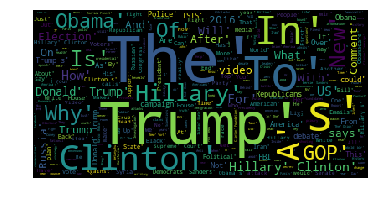

In [49]:
from collections import Counter
from wordcloud import WordCloud

word_counter_title = Counter(final_title_words)
word_counter_text = Counter(final_text_words)

wc = WordCloud(background_color = 'black', max_words = 1000)
wc.generate(str(final_title_words))
plt.imshow(wc)
plt.axis("off")
plt.show()

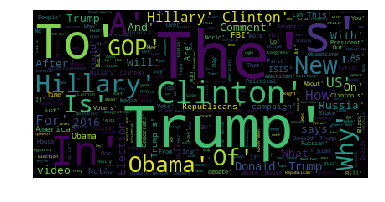

In [51]:
# let's remove The', Trump', Clinton
word_remove = ['The', 'Trump','Trump,','Trump\'s','Trump:','Clinton\'s','Clinton','Clinton,', 'Hillary']
for word in word_remove:
    final_title_words.remove(word)

wc.generate(str(final_title_words))
plt.imshow(wc)
plt.axis("off")
plt.show()

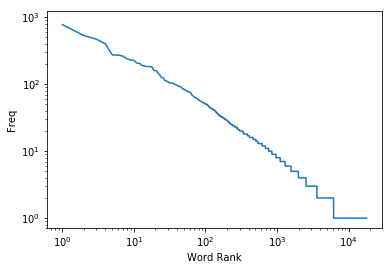

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

sorted_word_counts_title = sorted(list(word_counter_title.values()), reverse=True)

plt.loglog(sorted_word_counts_title)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

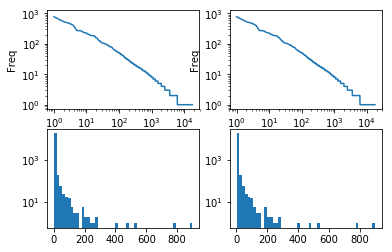

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

sorted_word_counts_title = sorted(list(word_counter_title.values()), reverse=True)
sorted_word_counts_text = sorted(list(word_counter_text.values()), reverse=True)

plt.figure(1)

plt.subplot(221)
plt.loglog(sorted_word_counts_title)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

plt.subplot(222)
plt.loglog(sorted_word_counts_title)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

plt.subplot(223)
plt.hist(sorted_word_counts_title, bins=50, log=True);

plt.subplot(224)
plt.hist(sorted_word_counts_text, bins=50, log=True);